In [5]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
from scipy.misc import imread

In [1]:
def get_sift(img):
    sift = cv.xfeatures2d.SIFT_create()

    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    kp = sift.detect(gray, None)

    ret_img = cv.drawKeypoints(gray, kp, img)

    cv.imwrite('sift_keypoints.jpg', img)
    return kp

In [19]:
def match_features(img1, img2):
    sift = cv.xfeatures2d.SIFT_create()

    gray1 = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
    gray2 = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)

    kp1, des1 = sift.detectAndCompute(gray1, None)

    kp2, des2 = sift.detectAndCompute(gray2, None)

    FLANN_INDEX_KDTREE = 1
    index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees=5)
    search_params = dict(checks=50)

    flann = cv.FlannBasedMatcher(index_params, search_params)

    matches = flann.knnMatch(des1, des2, k=2)

    good = []
    for m, n in matches:
        if m.distance < 0.85*n.distance:
            good.append(m)

    src_pts = np.float32([kp1[m.queryIdx].pt for m in good])
    dst_pts = np.float32([kp2[m.trainIdx].pt for m in good])

    M, mask = cv.findHomography(src_pts, dst_pts, cv.RANSAC, 5.0)
    mask = mask.ravel()

    return src_pts[mask==1].T, dst_pts[mask==1].T

In [20]:
def make_homogeneous(X):
    if X.ndim == 1:
        return np.hstack([X, 1])
    return np.array(np.vstack([X, np.ones(X.shape[1])]))

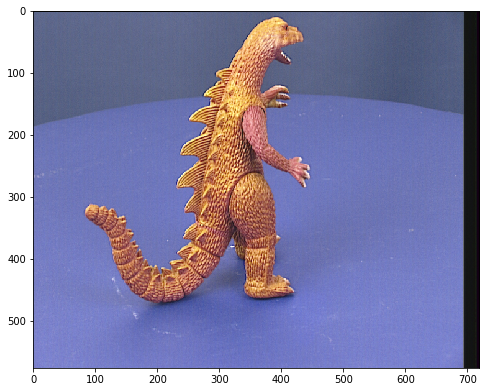

In [23]:
figure = plt.figure(figsize=(8, 8))
plt.imshow(img1)
plt.show()

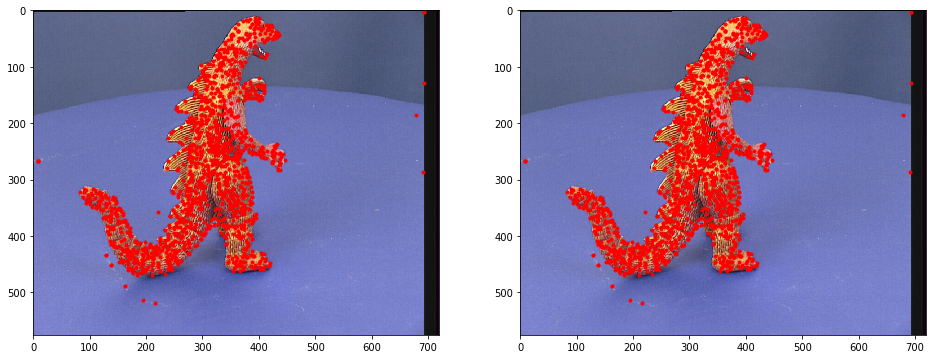

In [22]:
img1 = imread("images/viff.000.ppm")
img2 = imread("images/viff.000.ppm")

src, dst = match_features(img1, img2)

src = make_homogeneous(src)
dst = make_homogeneous(dst)

fig = plt.figure(figsize=(16, 8))

ax1 = fig.add_subplot(1, 2, 1)
ax1.imshow(img1)
ax1.plot(src[0], src[1], 'r.')

ax2 = fig.add_subplot(1, 2, 2)
ax2.imshow(img2)
ax2.plot(dst[0], dst[1], 'r.')
fig.show()
